# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [1]:
import nltk

nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\agama\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\agama\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\agama\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\agama\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\agama\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\agama\AppData\R

True

## 2.2 Introduction to NLTK

1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

**NOTEBOOK**

2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again.
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [86]:
import pandas as pd

df_rappers = pd.read_csv('./../files/Rappers.csv')
df_rappers = df_rappers.drop_duplicates(subset=["WikipediaPageName"])
df_rappers.head()

,WikipediaPageName,Coast
0,6ix9ine,East
1,9th Prince,East
2,22Gz,East
3,38 Spesh,East
4,The 45 King,East


In [87]:
import requests
from tqdm import tqdm
import os

baseurl = "https://en.wikipedia.org/w/api.php?"
params = {
    "action": "query",
    "prop": "extracts",
    "exlimit": "1",
    "explaintext": "1",
    "rvprop": "content",
    "format": "json"
}
# TODO/TO CONSIDER: save into east/west and change the creation of corpuses 
# (merge two file lists to create main one )
for name in tqdm(df_rappers["WikipediaPageName"]):
    params["titles"] = name
    filename = f"rappers_pages/{name.replace('?', '')}.txt"

    if not os.path.isfile(filename):
        wikitext = requests.get(baseurl, params=params)
        wikijson = wikitext.json()
        wikipage = list(wikijson["query"]["pages"].keys())[0]
        pagetext = wikijson["query"]["pages"][wikipage]["extract"]
        with open(filename, 'w') as f:
            f.write(pagetext)

df_rappers["WikipediaPageName"] = df_rappers["WikipediaPageName"].str.replace("?", "") # due to 591

  0%|          | 0/798 [00:00<?, ?it/s]

100%|██████████| 798/798 [00:00<00:00, 1581.84it/s]


In [88]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "rappers_pages"
file_list = os.listdir("rappers_pages")
df_rappers = df_rappers.sort_values("WikipediaPageName", ascending=True)
corpus = PlaintextCorpusReader(corpus_root, file_list)
text = nltk.Text(corpus.words())

In [89]:
assert len(file_list) == len(df_rappers)

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any words you like.
> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?
> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [66]:
text.concordance("angry")

Displaying 10 of 10 matches:
 . He vowed to use hip - hop to draw angry kids out of gangs and form the Unive
oice roles in the animated films The Angry Birds Movie 2 ( 2019 ), Raya and the
ally confirmed by Eminem in his book Angry Blonde , stating that the tune for t
Brown explained she was particularly angry at Rule ' s response , having never 
he webcast Go Sick as Bruebaker , an angry , cursing wrestler in 2001 . During 
Miami Vice ( Composer ) " Love Is an Angry Thing " Anthony Hamilton ( Producer 
derly , disruptive , argumentative , angry and agitated behaviors toward patron
lHipHop . com , in which he appeared angry and frustrated with his former partn
 would " huff and puff " when he was angry . Combs was a business major at Howa
et up by E - 40 ' s goons , who were angry about an interview Wallace did with 


In [67]:
text.similar("groundbreaking")

rap new popular successful celebrated american california mainstream
album prolific early only own two first young no single netflix
recording


In [68]:
text.common_contexts(["record", "track"])

the_was the_for the_featured the_and diss_titled the_in a_of a_for
a_and a_in the_to the_as a_that first_he the_back the_s s_of the_that
the_album a_called


In [73]:
# TODO
# text.dispersion_plot()

In [77]:
# collocation - sequence of words that occur together unusually often
# bigrams - list of word pairs
text.collocations()

New York; hip hop; External links; Los Angeles; studio album; stage
name; Hot 100; Billboard 200; American rapper; music video; Hip Hop;
Early life; Snoop Dogg; York City; United States; better known; debut
album; Billboard Hot; High School; Def Jam


In [126]:
h_words = [w for w in text if w.startswith('h')]
sorted(set(h_words), key=lambda x: x.lower())[:5] # set -- unique words, ignore case!

['h', 'h10010005', 'ha', 'habit', 'habits']

In [108]:
print(text.index("Snoop"))
" ".join(text[3486:3513])

3506


'He has also been on tour with such acts as G - Unit , Mobb Deep , Ray J , Snoop & Doggpound and many more .'

In [120]:
upper_words = {}
for token in text:
    if token.isupper():
        upper_words[token] = len(token)
sorted_upper_words = dict(sorted(upper_words.items(), key=lambda item: item[1], reverse=True))
list(sorted_upper_words.keys())[:5]

['CHRISTMAKWHANNUVUSWALIYEARS',
 'SHINIGAMISTARSHIP',
 'AREYOUREADYKIDS',
 'PNCINTLOFWGKTA',
 'MERRYPOCALYPSE']

> *Exercise 2*: Basic stats
>
> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;
>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.
> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 
> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.
> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

In [122]:
print(len(text)) # tokens
print(len(set(text))) # unique tokens

1195547
42701


In [123]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

lexical_diversity(text)

0.03571670540765022

In [144]:
east_rappers = df_rappers[df_rappers["Coast"] == 'East']["WikipediaPageName"].tolist()
west_rappers = df_rappers[df_rappers["Coast"] == 'West']["WikipediaPageName"].tolist()

east_files = [f for f in file_list if f.split(".")[0] in east_rappers]
west_files = [f for f in file_list if f.split(".")[0] in west_rappers]

text_east = nltk.Text(corpus.words(east_files))
text_west = nltk.Text(corpus.words(west_files))

print(lexical_diversity(text_east))
print(lexical_diversity(text_west))

0.04409359051209797
0.05919970331206436


1195547


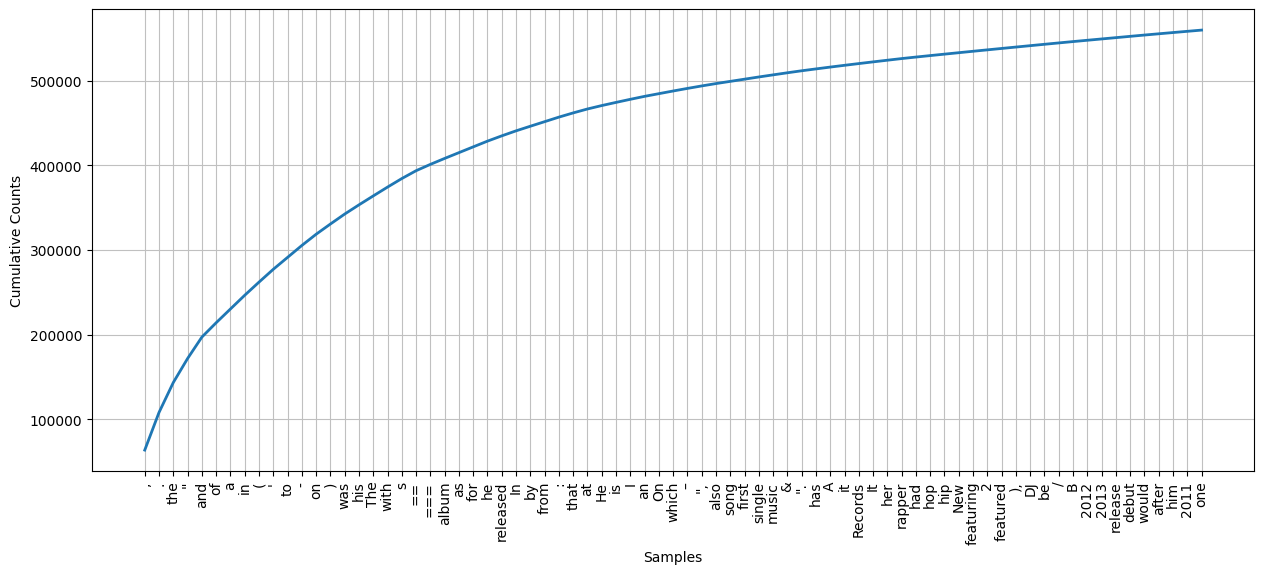

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [153]:
fdist = nltk.FreqDist(text)

import matplotlib.pyplot as plt
print(len(text))
plt.figure(figsize=(15,6))
fdist.plot(75, cumulative=True)

In [165]:
four_letter = {w:fdist[w] for w in set(text) if len(w) == 4}
sorted_four_letter = dict(sorted(four_letter.items(), key=lambda item: item[1], reverse=True))
list(sorted_four_letter.keys())[:5]

['with', 'from', 'that', 'also', 'song']

In [168]:
total_length = sum(len(w) for w in text) # length of all the words/characters in the text
total_count = len(text)
total_length/total_count # avg token length

3.8780466179915973

In [173]:
def vocab_size(text):
    return len(set(w.lower() for w in text if w.isalpha()))

print(vocab_size(text))

def percent(word, text): # ?
    fdist = nltk.FreqDist(text)
    return fdist[word]/len(text) * 100

print(percent("Dre", text))

33568
0.05729594905093652


# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

In [177]:
# nltk.corpus.gutenberg.fileids()
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>